
# Miralireza Nabavi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

# 1. Fitting kNN to the Cars Data, just mileage

- Get the susedcars.csv data set from the webpage. Plot x=mileage versus y=price. (price is the price of a used car.)

In [2]:
data = pd.read_csv("https://bitbucket.org/remcc/rob-data-sets/downloads/susedcars.csv")
print(data.shape)
data.head()

(1000, 7)


,price,trim,isOneOwner,mileage,year,color,displacement
0,43995,550,f,36858.0,2008,Silver,5.5
1,44995,550,f,46883.0,2012,Black,4.6
2,25999,550,f,108759.0,2007,White,5.5
3,33880,550,f,35187.0,2007,Black,5.5
4,34895,550,f,48153.0,2007,Black,5.5


Text(0, 0.5, 'price')

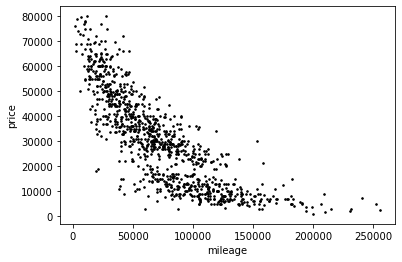

In [3]:
mileage = data[['mileage']].to_numpy()
price = data[['price']].to_numpy()

plt.scatter(mileage,price,s=10,c='k',marker='.')
plt.xlabel('mileage')
plt.ylabel('price')

- Does the relationship between mileage and price make sense?

Answer : Yes, it makes sense. Since as the mileage increases, price should decrease.

- Add the fit from a linear regression to the plot. Add the fit from kNN for various values of k to the plot.

In [4]:
# Linear Model
lm = LinearRegression(fit_intercept=True)
lm.fit(mileage,price)

Xtest = np.sort(mileage[:,0])[:,np.newaxis]
yhat_linear = lm.predict(Xtest)

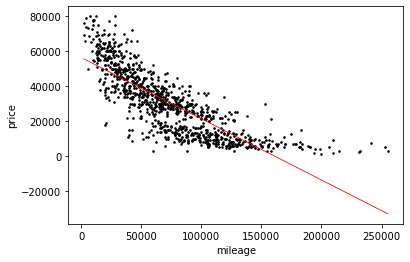

In [5]:
plt.scatter(mileage,price,s=10,c='k',marker='.')
plt.xlabel('mileage')
plt.ylabel('price')

plt.plot(Xtest,yhat_linear,c='red',linewidth=.8)

In [6]:
# KNN model
knnmod = KNeighborsRegressor(n_neighbors=5)

# fit with training data
knnmod.fit(mileage,price)

yhat_knn = knnmod.predict(Xtest)

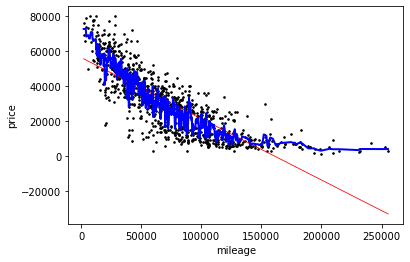

In [7]:
plt.scatter(mileage,price,s=10,c='k',marker='.')
plt.xlabel('mileage')
plt.ylabel('price')

plt.plot(Xtest,yhat_linear,c='red',linewidth=.8)
plt.plot(Xtest,yhat_knn,c='blue',linewidth=2)

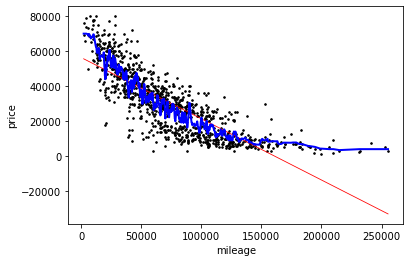

In [8]:
# KNN model
knnmod = KNeighborsRegressor(n_neighbors=10)

# fit with training data
knnmod.fit(mileage,price)

yhat_knn = knnmod.predict(Xtest)

plt.scatter(mileage,price,s=10,c='k',marker='.')
plt.xlabel('mileage')
plt.ylabel('price')

plt.plot(Xtest,yhat_linear,c='red',linewidth=.8)
plt.plot(Xtest,yhat_knn,c='blue',linewidth=2)

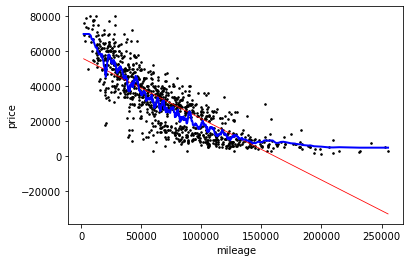

In [9]:
# KNN model
knnmod = KNeighborsRegressor(n_neighbors=20)

# fit with training data
knnmod.fit(mileage,price)

yhat_knn = knnmod.predict(Xtest)

plt.scatter(mileage,price,s=10,c='k',marker='.')
plt.xlabel('mileage')
plt.ylabel('price')

plt.plot(Xtest,yhat_linear,c='red',linewidth=.8)
plt.plot(Xtest,yhat_knn,c='blue',linewidth=2)

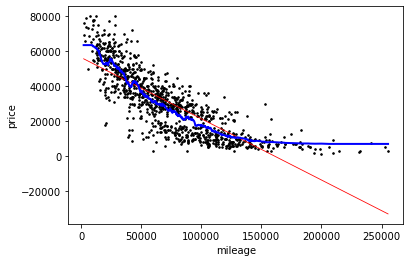

In [10]:
# KNN model
knnmod = KNeighborsRegressor(n_neighbors=50)

# fit with training data
knnmod.fit(mileage,price)

yhat_knn = knnmod.predict(Xtest)

plt.scatter(mileage,price,s=10,c='k',marker='.')
plt.xlabel('mileage')
plt.ylabel('price')

plt.plot(Xtest,yhat_linear,c='red',linewidth=.8)
plt.plot(Xtest,yhat_knn,c='blue',linewidth=2)

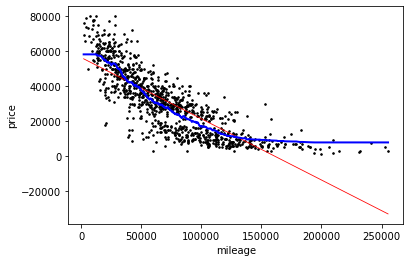

In [11]:
# KNN model
knnmod = KNeighborsRegressor(n_neighbors=100)

# fit with training data
knnmod.fit(mileage,price)

yhat_knn = knnmod.predict(Xtest)

plt.scatter(mileage,price,s=10,c='k',marker='.')
plt.xlabel('mileage')
plt.ylabel('price')

plt.plot(Xtest,yhat_linear,c='red',linewidth=.8)
plt.plot(Xtest,yhat_knn,c='blue',linewidth=2)

- For what value of k does the plot look nice?

For K = 100 my regression looks nice.

- Using your “nice” value of k, what is the predicted price of a car with 100,000 miles on it?

In [12]:
print('Predicted price for a car with 100,000 miles on it (according to KNN100 model) is ' + str(knnmod.predict([[100000]])))


Predicted price for a car with 100,000 miles on it (according to KNN100 model) is [[16832.2]]


- What is the prediction from a linear fit?

In [13]:
print('Predicted price for a car with 100,000 miles on it (according to linear model) is ' + str(lm.predict([[100000]])))


Predicted price for a car with 100,000 miles on it (according to linear model) is [[21362.33201527]]


# 2. Fitting kNN to the Cars Data, just mileage, knn or linear?

- Which model is better for the cars data with x=mileage and y=price, KNN (with a nice k) or the linear model.

In [14]:
### train/test split

#train/test split
myseed = 34
Xtrain, Xtest, ytrain, ytest = train_test_split(mileage,price,random_state=myseed, test_size=.2)

# model object
kmod = KNeighborsRegressor(n_neighbors=100)

# fit on train
kmod.fit(Xtrain,ytrain)

# predict on test
knn_ypred = kmod.predict(Xtest)

# Linear model
lm = LinearRegression(fit_intercept=True)
lm.fit(Xtrain,ytrain)

linear_ypred = lm.predict(Xtest)

In [15]:
#rmse
linear_rmse = math.sqrt(mean_squared_error(ytest,linear_ypred))
print('The rmse of the linear model is ',linear_rmse)
 
knn_rmse = math.sqrt(mean_squared_error(ytest,knn_ypred))
print('The rmse of the Knn 100 model is ',knn_rmse)

The rmse of the linear model is  9929.184560765752
The rmse of the Knn 100 model is  8548.553226299582


In [16]:
print('The r2 score of the linear model is ',r2_score(ytest, linear_ypred))

The r2 score of the linear model is  0.7295758759878144


In [17]:
print('The r2 score of the KNN model is ',r2_score(ytest, knn_ypred))

The r2 score of the KNN model is  0.79955117945923


- Use a simple train/test split to see which model looks best.

The KNN (100) model works better as it has a higher r2 score and also smaller rmse.

- Use plots to illustrate the results.

In [18]:
# KNN100 prediction on test set
knn_ypred = kmod.predict(Xtest)

# Linear model prediction on test set
linear_ypred = lm.predict(Xtest)

(-20000.0, 60000.0)

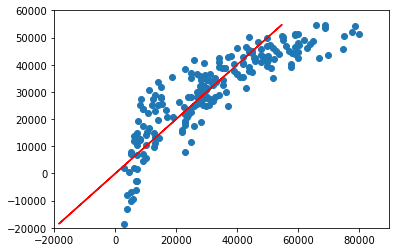

In [19]:
plt.scatter(ytest,linear_ypred)
plt.plot(linear_ypred,linear_ypred,c='red')
plt.xlim([-20000,90000])
plt.ylim([-20000,60000])

(-20000.0, 60000.0)

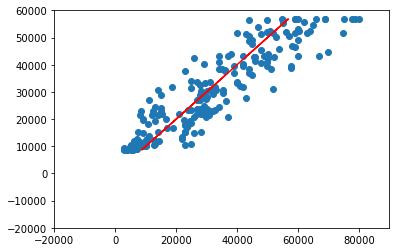

In [20]:
plt.scatter(ytest,knn_ypred)
plt.plot(knn_ypred,knn_ypred,c='red')
plt.xlim([-20000,90000])
plt.ylim([-20000,60000])

# The KNN100 prediction looks much better than the linear prediction

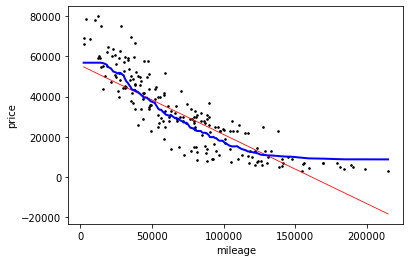

In [21]:
# Scatter plot for the test set
plt.scatter(Xtest,ytest,s=10,c='k',marker='.')
plt.xlabel('mileage')
plt.ylabel('price')

# Let's sort the Xtest
Xtest = np.sort(Xtest[:,0])[:,np.newaxis]

# KNN100 prediction on the sorted test set
knn_ypred = kmod.predict(Xtest)

# Linear model prediction on sorted test set
linear_ypred = lm.predict(Xtest)

plt.plot(Xtest,linear_ypred,c='red',linewidth=.8)
plt.plot(Xtest,knn_ypred,c='blue',linewidth=2)